<a href="https://colab.research.google.com/github/auiee/1.21/blob/main/StableDeffusion_GoogleColab%20Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stable deffusion : Google Colab版

## モデルの読み込み *(起動したときの最初のみ)*

In [ ]:
import torch
from diffusers import StableDiffusionXLPipeline, EulerAncestralDiscreteScheduler
from transformers import CLIPTokenizer, CLIPTextModel
from IPython.display import Image, display_png
from PIL import Image
from google.colab import drive

# Google Drive をマウント
drive.mount('/content/drive')

# モデルのパス
model_path = "/content/drive/MyDrive/vxpILXL_v17.safetensors" #@param {type:"string"}

# モデルをロード
pipe = StableDiffusionXLPipeline.from_single_file(
    model_path,
    torch_dtype=torch.float16
).to("cuda")

# Euler Ancestral スケジューラを適用
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

## 画像生成

  0%|          | 0/30 [00:00<?, ?it/s]

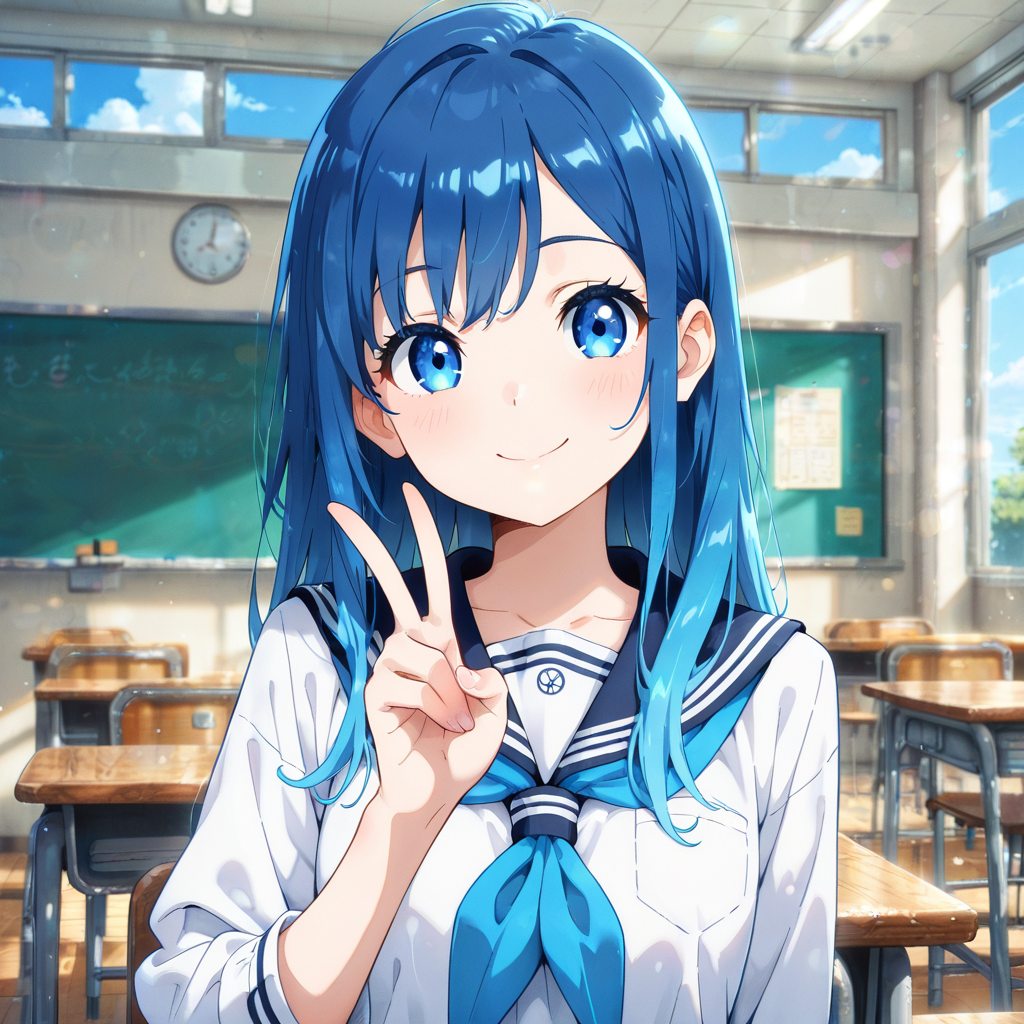

  0%|          | 0/30 [00:00<?, ?it/s]

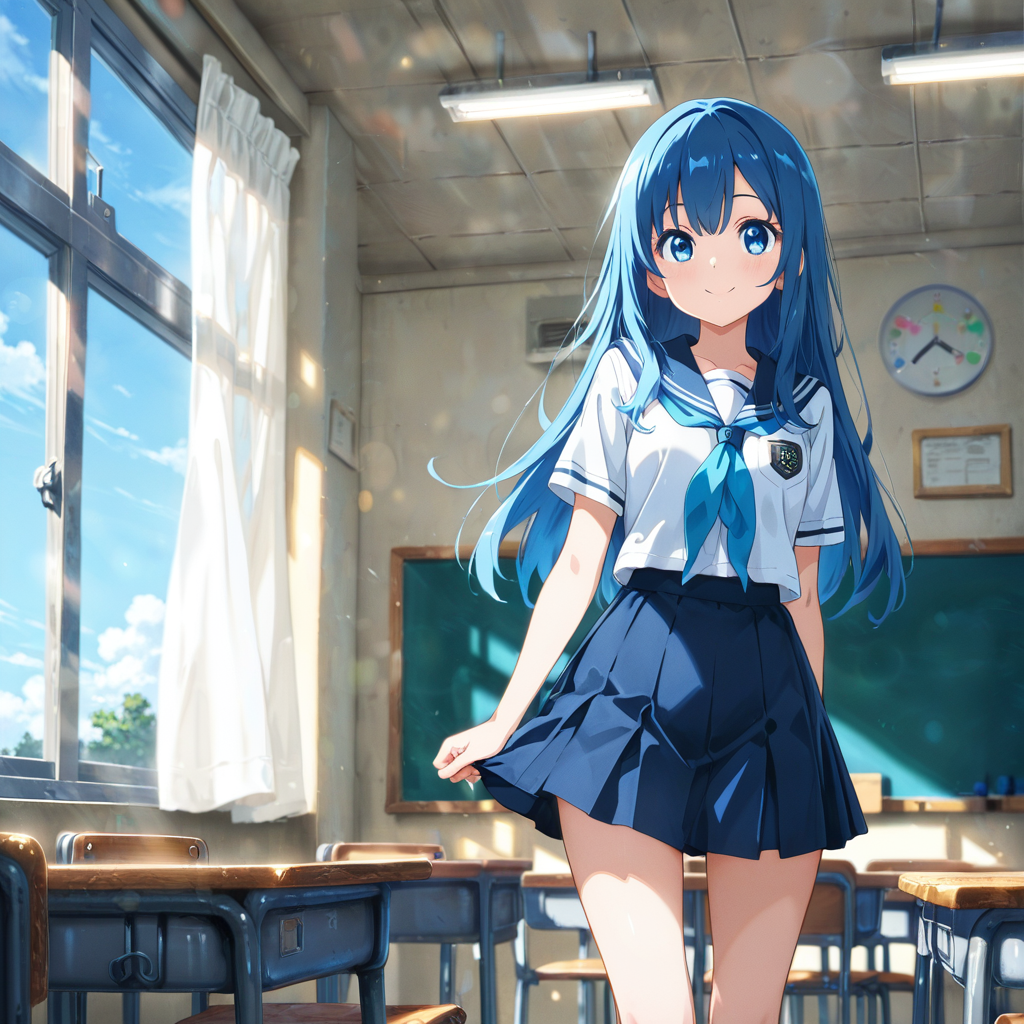

  0%|          | 0/30 [00:00<?, ?it/s]

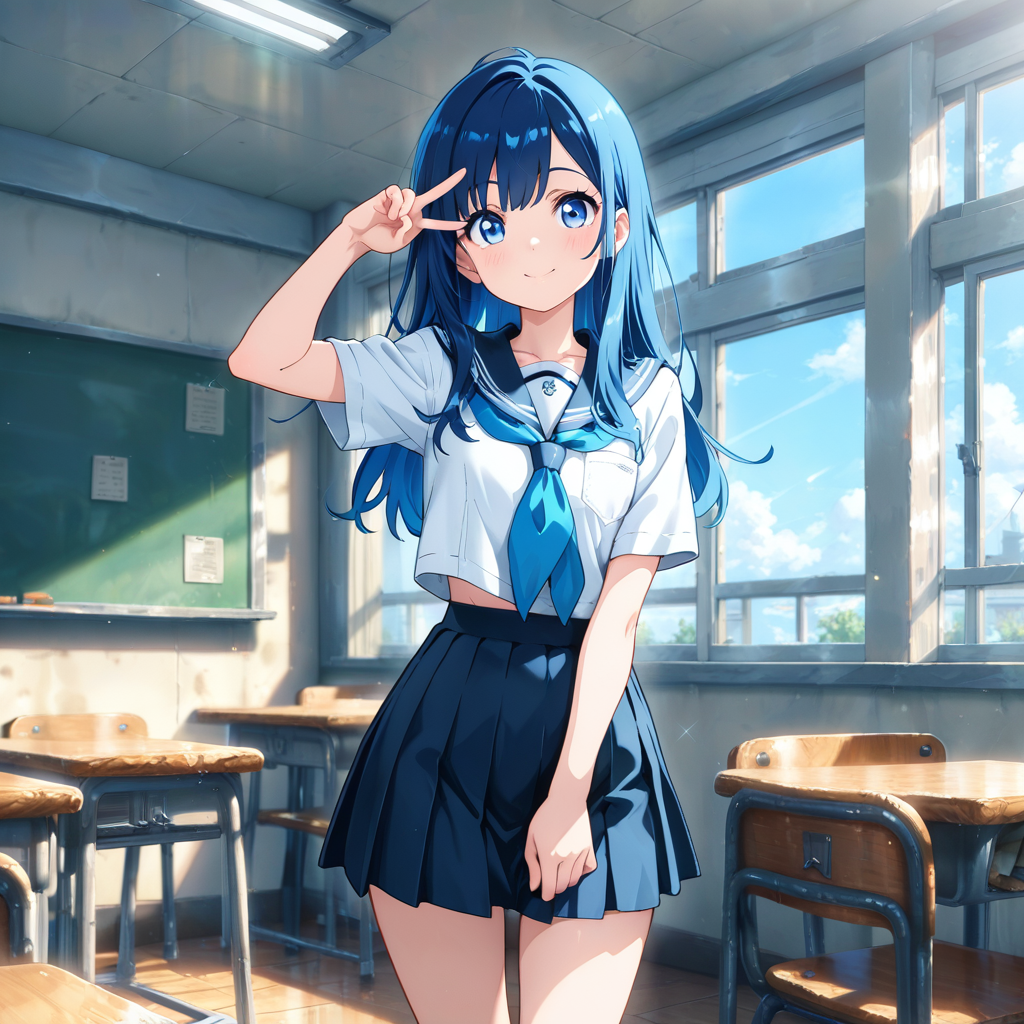

  0%|          | 0/30 [00:00<?, ?it/s]

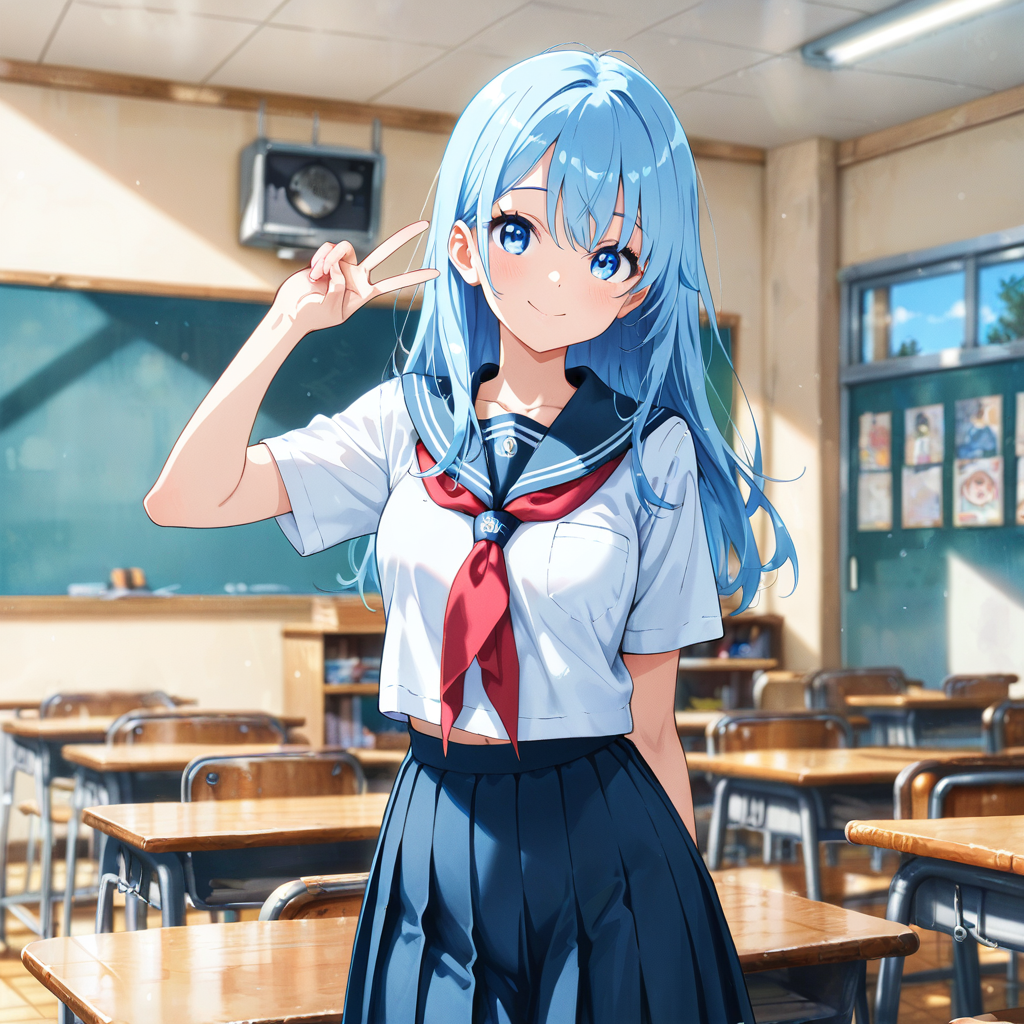

In [25]:
prompt = "(1girl), 16 year old, masterpiece, ultra detailed, high resolution, beautiful eye, high quality, (peace sign), blue sky, (beautiful eyes), long hair, blue hair, school uniforms,  standing, (light coloring), smile, daily life, classroom, (thin lines, detailed face), animation style, art style" #@param {type:"string"}
negative_prompt = "colored fingernail, bad quality, worst quality, worst detail, bad, low quality, bad anatomy, 6 fingers, bad hands, bad feet, bad hand, bad finger, bad fingers, extra finger, extra fingers, split finger, split fingers, extra digits, fused arms, fused hands" #@param {type:"string"}
image_width = 512 #@param {type:"number"}
image_height = 768 #@param {type:"number"}
num_steps = 30 #@param {type:"number"}
count = 4 #@param {type:"number"}

# 画像生成ループ
for i in range(count):
    image = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=num_steps).images[0]

    # 画像の保存
    image.save(f"/content/{i}.png")
    display_png(Image(f"/content/{i}.png"))